In [2]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [22]:
x=[]
x.append(np.loadtxt('./data/Ising2D_config_L20.dat.gz'))
x.append(np.loadtxt('./data/Ising2D_config_L40.dat.gz'))
x.append(np.loadtxt('./data/Ising2D_config_L80.dat.gz'))

In [25]:
import scipy.linalg
N=[]
Σ=[]
λ,V =[],[]
for i in range(3):
    N.append(x[i].shape[0])
    x[i] -= np.average(x[i],axis=0)
    Σ.append(x[i].T @ x[i] / (N[i]-1))
    λ_t,V_t = scipy.linalg.eigh(Σ[i])
    λ.append(λ_t)
    V.append(V_t)

In [27]:
for i in range(3):
    λ[i] = λ[i][::-1]
    V[i] = np.flip(V[i],axis=1)

In [29]:
px = []
for i in range(3):
    px.append(x[i] @ V[i])


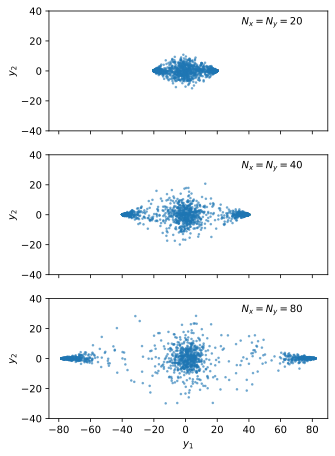

In [48]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(5,7.5))
nn = ['20','40','80']
ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-40,40])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    ax[i].scatter(px[i][:,0],px[i][:,1], s=3, alpha=0.5)

At the smaller lattice sizes the feature grouping appears to be less distinguishable at each phase. We shall see if this is true once we color our points.


In [ ]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(5,7.5))

ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-40,40])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    ax[i].scatter(px[i][:,0],px[i][:,1], s=3, alpha=0.5)